In [1]:
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm, trange
import numpy as np
import matplotlib.pyplot as plt
import torch
import json

import imageio.v3 as iio

from torch import nn, optim
from torchsummary import summary

In [ ]:
!pip install torchsummary

In [2]:
# Own data
def get_data(t_path: str, i_path: str):
    '''
        Given a path to a transformation.json file,
        returns the cam2world matrices and intrinsics
        
        t_path: Path to the transforms.json file
        i_path: Path to the folder containing image files
        
    '''
    with open('/'.join([t_path, 'transforms.json']), 'r') as f:
        data = json.load(f)
        
        # Intrinsic parameters
        cx = np.array(data['cx']).astype('float32')
        cy = np.array(data['cy']).astype('float32')
        fx = np.array(data['fl_x']).astype('float32')
        fy = np.array(data['fl_y']).astype('float32')

        width : int = data['w']
        height: int = data['h']

        intrinsics = (fx,fy,cx,cy) 
        
        extrinsics : list = []
        images : list = []
            
        for element in data['frames']:
            cam2world = element['transform_matrix']
            img_path = element['file_path']

            # Extract index from img path
            idx = int(''.join(filter(str.isdigit, img_path)))
            real_img_path = '/'.join([i_path, '{0:04d}.png'.format(idx)])
            
            img = iio.imread(real_img_path).astype('float32') / 255.
            
            # Downscale image
            img = img[::8,::8,:]
            images.append(img)
            
            # img = imread(real_img_path)
            extrinsics.append(np.array(element['transform_matrix']).astype('float32'))
        return (extrinsics, intrinsics, images)

In [ ]:
cam2world[0].dtype

In [ ]:
# Sample data provided by the original NeRF implementation
!wget http://cseweb.ucsd.edu/~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz

data = np.load('tiny_nerf_data.npz')

images = data['images']
poses = data['poses']
NUM_IMAGES = images.shape[0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = []
y = []
z = []

for i in range(100):
    # Get translation vector
    p = poses[i][:3,3]
    x.append(p[0])
    y.append(p[1])
    z.append(p[2])

ax.scatter(x,y,z)

plt.show()

In [ ]:
imgs = data['images'][0]
print(imgs.shape)
plt.imshow(imgs)

In [3]:
class TinyNeRF(torch.nn.Module):
  """
      Define a "very tiny" NeRF model comprising three fully connected layers.
  
      Tiny NeRF model with four connected layers
      
      (encoding_function * 3 * 2 + 3, 256)
      (256, 256)
      (256, 128)
      (128, 4)
  
  """
  def __init__(self):
    super(TinyNeRF, self).__init__()

    self.HIDDEN_1 = 256
    self.HIDDEN_2 = 128
    self.OUTPUT_DIM = 4
    
    self.NUM_ENCODING_FUNCTIONS = 6
    
    
    self.layer_1 = torch.nn.Linear(
        3 + 3 * 2 * self.NUM_ENCODING_FUNCTIONS, self.HIDDEN_1)
    self.layer_2 = torch.nn.Linear(
        self.HIDDEN_1, self.HIDDEN_1)
    self.layer_3 = torch.nn.Linear(
        self.HIDDEN_1, self.HIDDEN_2
    )
    self.layer_4 = torch.nn.Linear(
        self.HIDDEN_2, self.OUTPUT_DIM)
    self.relu = torch.nn.functional.relu
  
  def forward(self, x):
    x = self.relu(self.layer_1(x))
    x = self.relu(self.layer_2(x))
    x = self.relu(self.layer_3(x))
    x = self.layer_4(x)
    return x

Loss: 0.30122530460357666


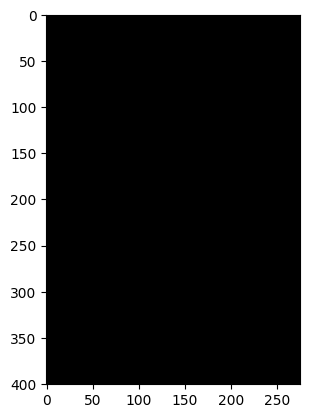

Loss: 0.020771943032741547


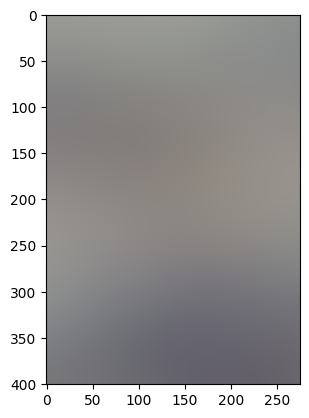

Loss: 0.023961208760738373


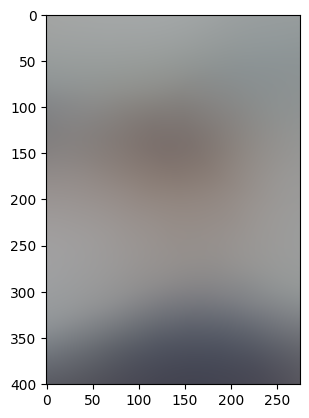

Loss: 0.01992739737033844


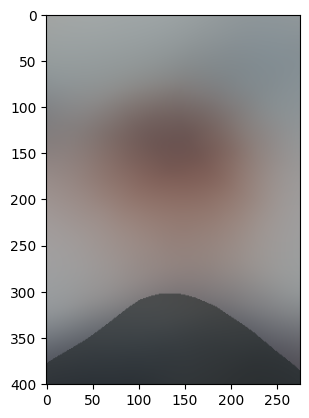

Loss: 0.029329288750886917


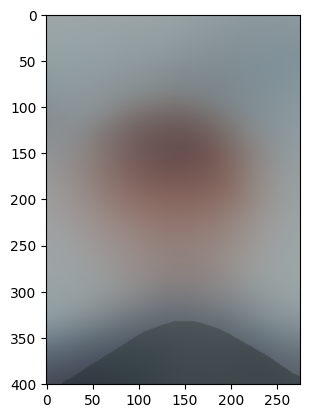

Loss: 0.010986041277647018


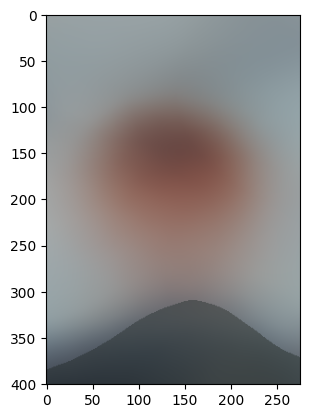

Loss: 0.020540356636047363


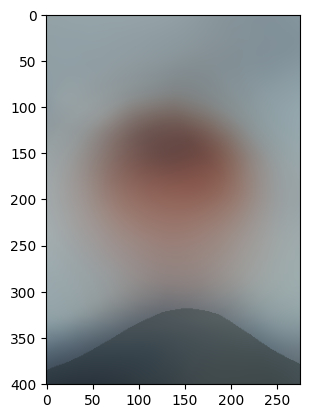

Loss: 0.007478546816855669


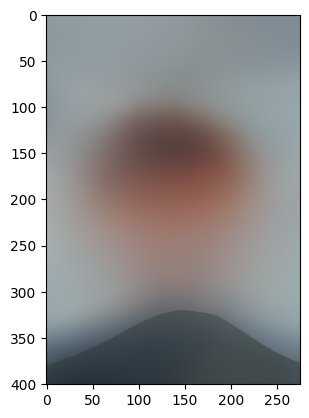

Loss: 0.032268356531858444


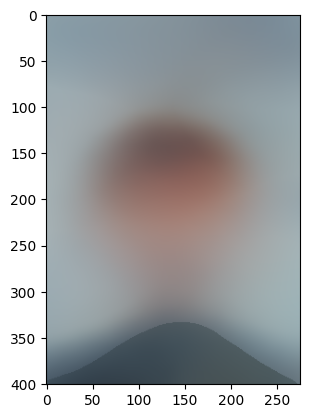

Loss: 0.029559114947915077


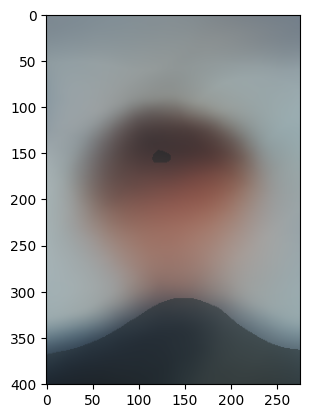

Loss: 0.03265495225787163


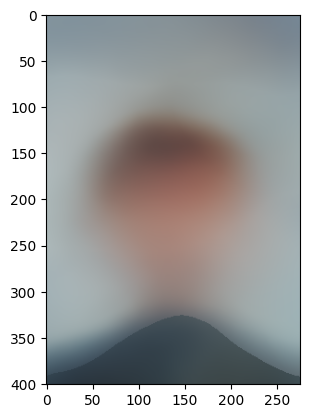

Loss: 0.021114185452461243


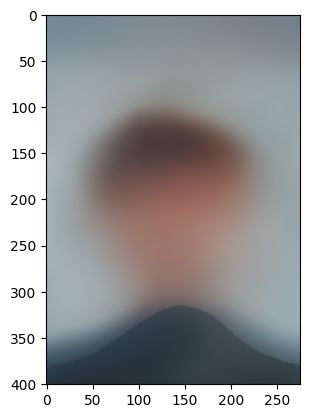

Loss: 0.04031745716929436


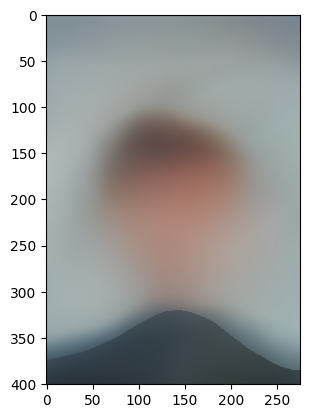

Loss: 0.02428046427667141


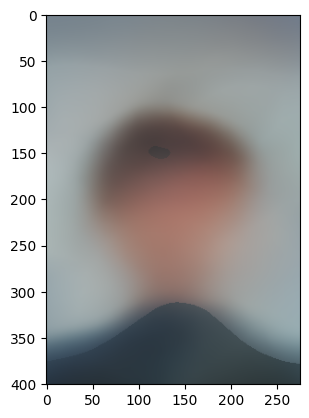

Loss: 0.0380668006837368


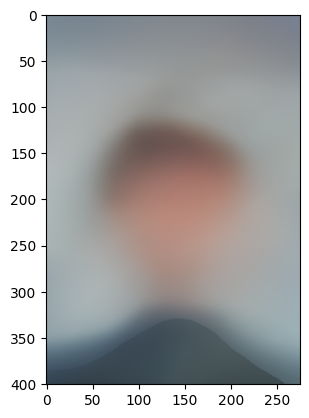

Loss: 0.006573657970875502


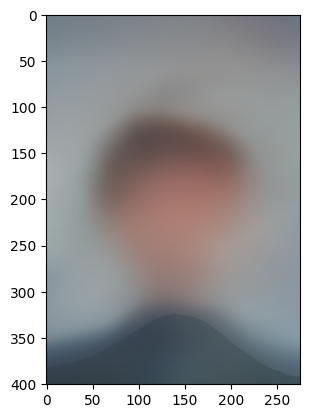

Loss: 0.02545028179883957


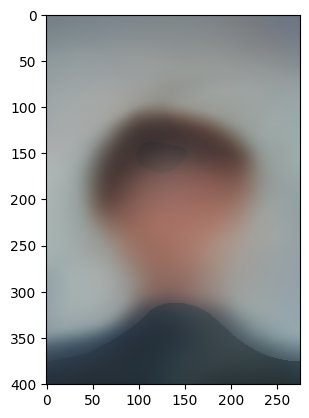

Loss: 0.04080189764499664


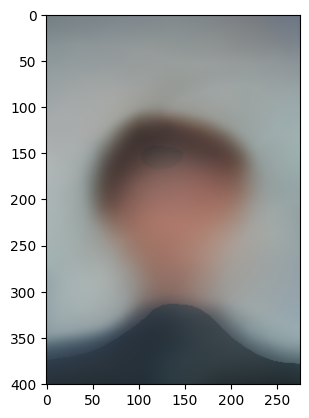

Loss: 0.009030524641275406


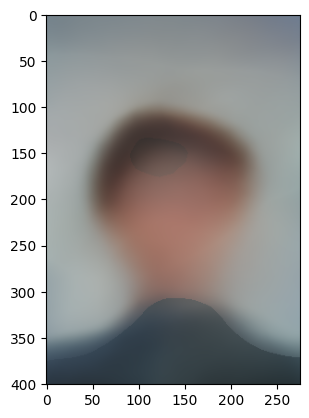

Loss: 0.021891068667173386


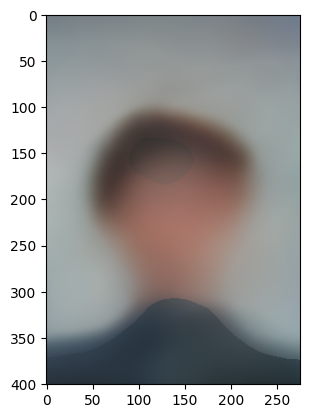

Loss: 0.012328197248280048


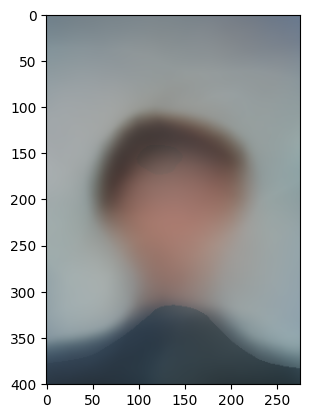

Loss: 0.0074393488466739655


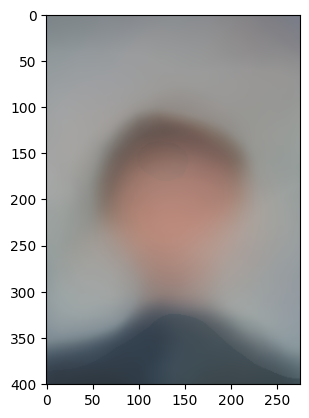

Loss: 0.02410294860601425


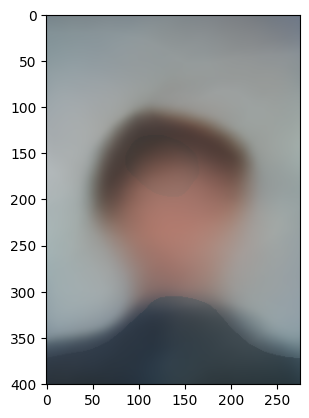

Loss: 0.021557586267590523


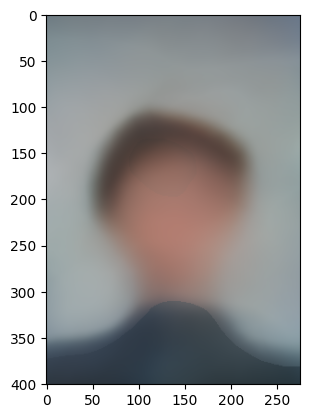

Loss: 0.03249889612197876


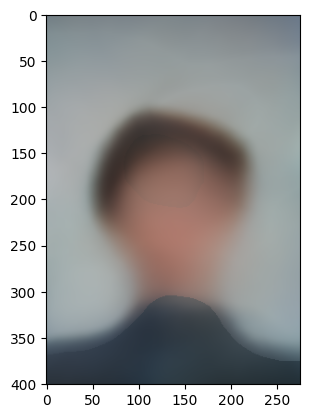

Loss: 0.024848446249961853


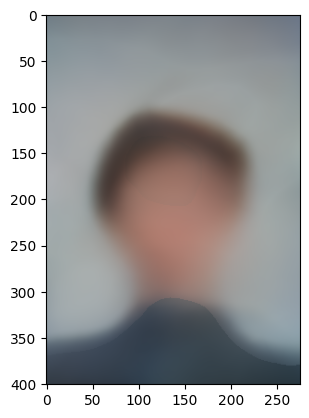

Loss: 0.036055296659469604


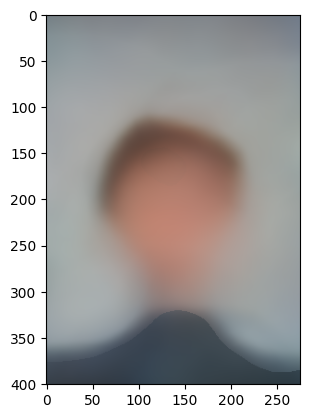

Loss: 0.016289887949824333


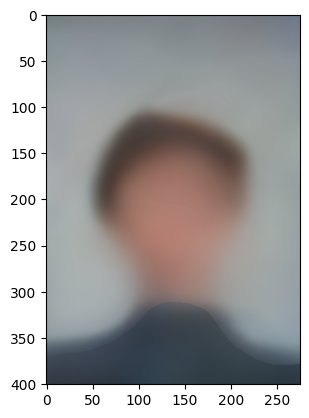

Loss: 0.036865994334220886


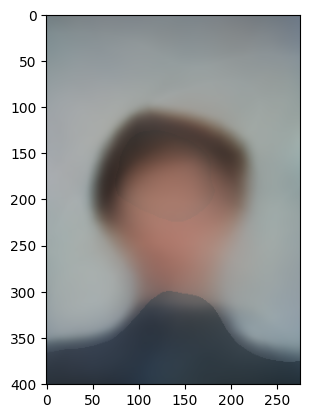

Loss: 0.03791724145412445


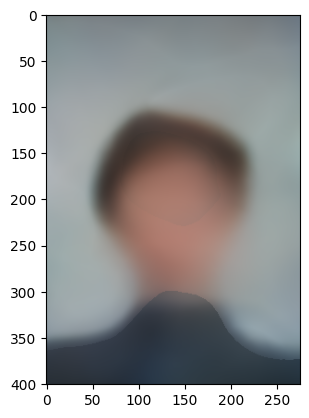

Loss: 0.0185655876994133


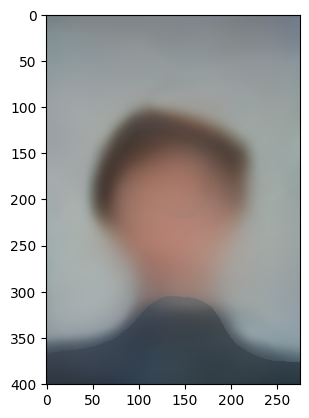

Loss: 0.029959458857774734


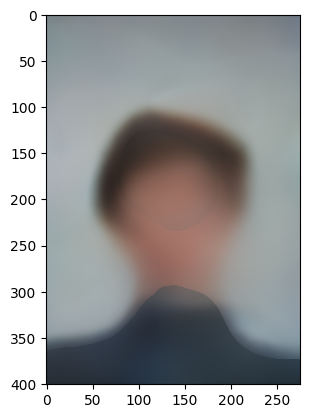

Loss: 0.0171397402882576


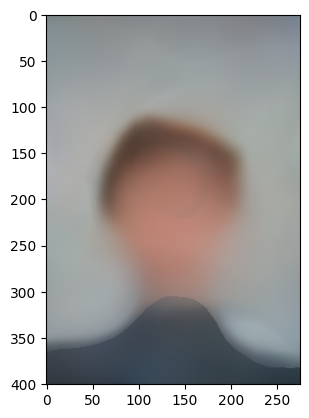

Loss: 0.018803177401423454


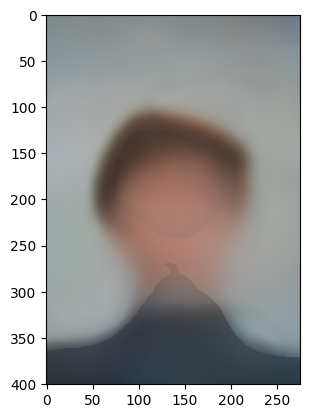

Loss: 0.02048780582845211


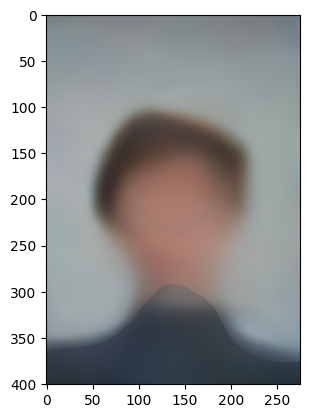

Loss: 0.026820136234164238


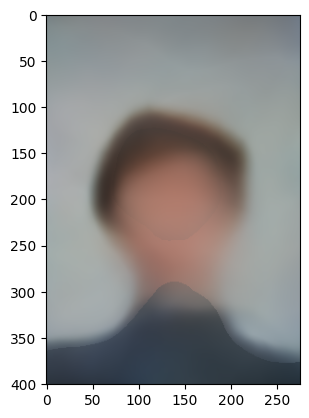

Loss: 0.03464305400848389


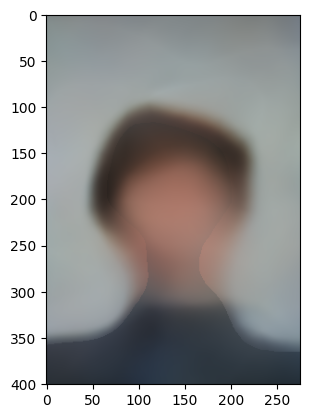

Loss: 0.03527601808309555


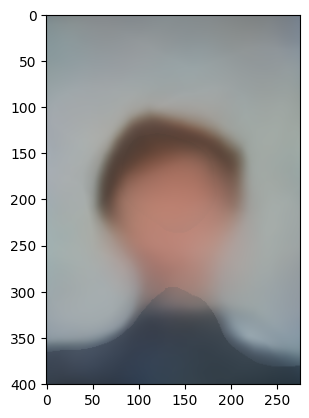

Loss: 0.02352842129766941


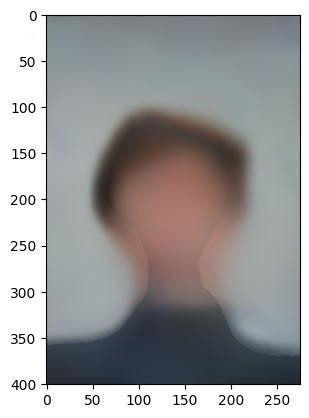

Loss: 0.027957668527960777


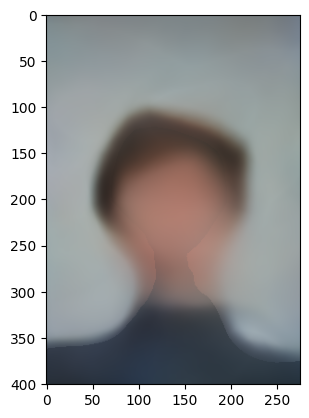

Loss: 0.04228130728006363


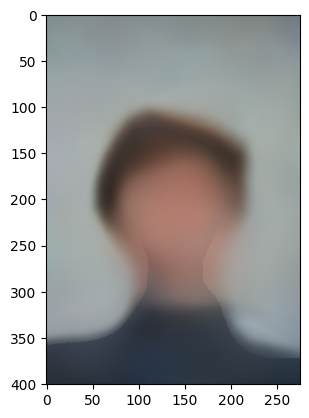

Loss: 0.023056568577885628


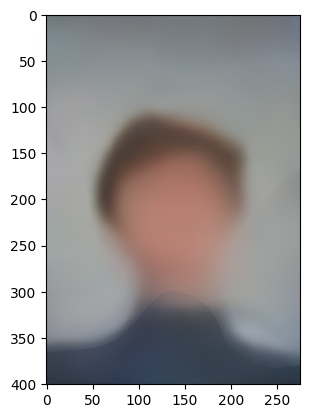

Loss: 0.01771576516330242


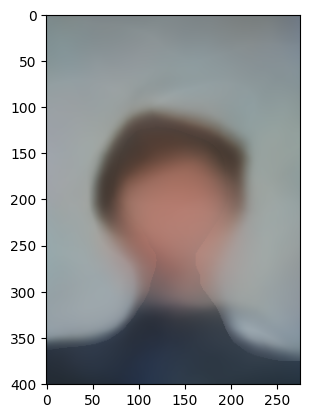

Loss: 0.03139853850007057


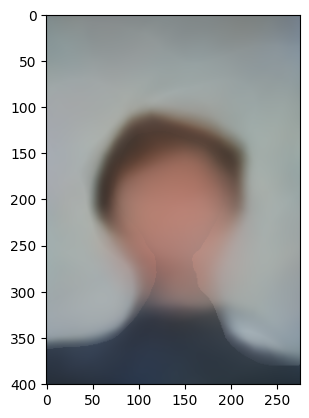

Loss: 0.023356443271040916


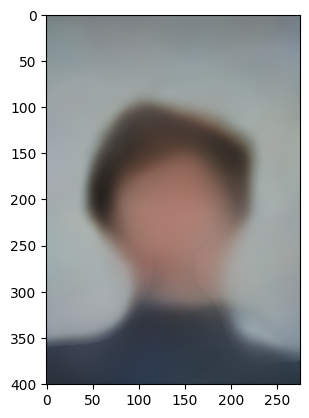

Loss: 0.02771485596895218


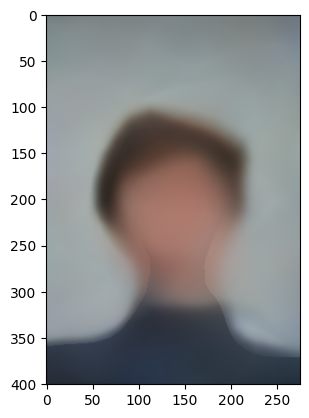

Loss: 0.026303965598344803


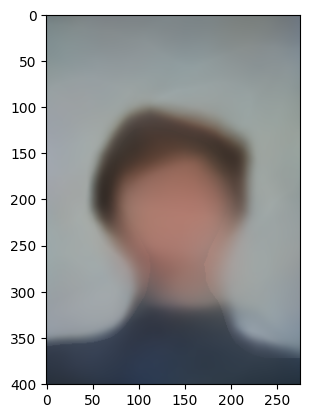

Loss: 0.007503893226385117


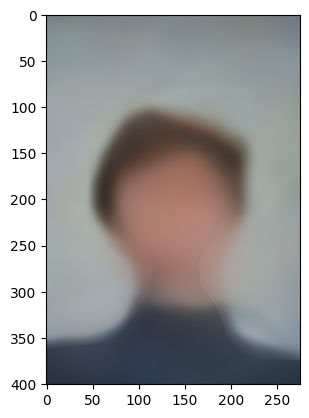

Loss: 0.03293976932764053


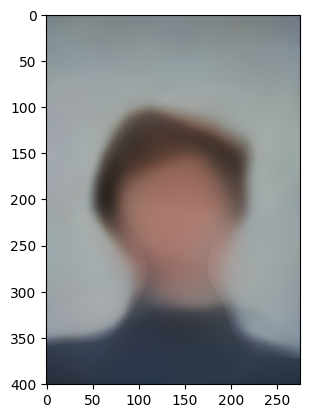

Loss: 0.04057435691356659


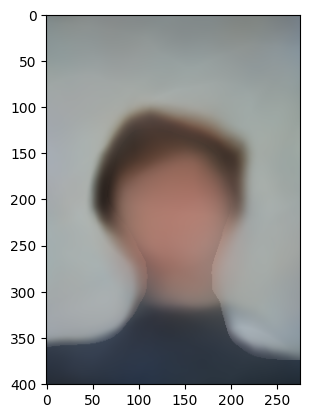

Loss: 0.0341593399643898


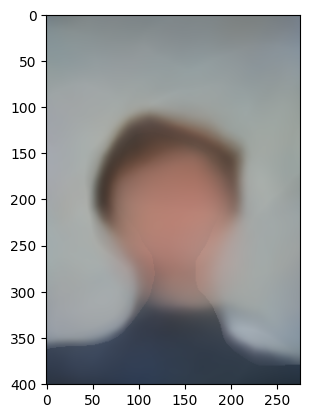

Loss: 0.006658991798758507


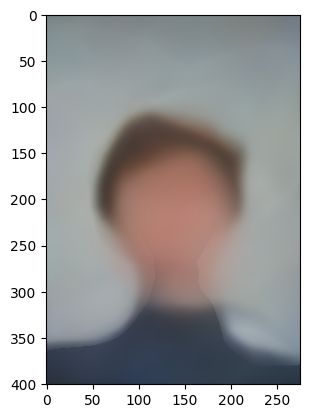

Loss: 0.028887782245874405


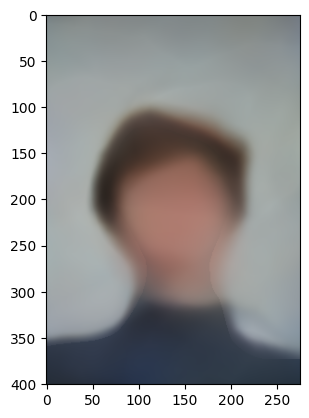

Loss: 0.03216678276658058


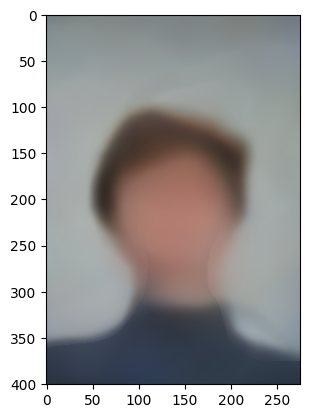

Loss: 0.002272609621286392


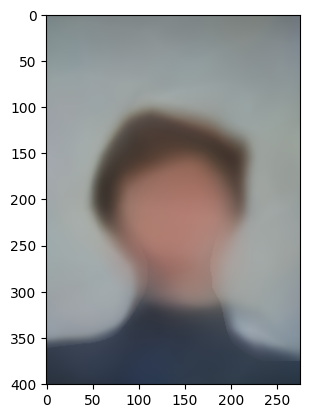

Loss: 0.0024738807696849108


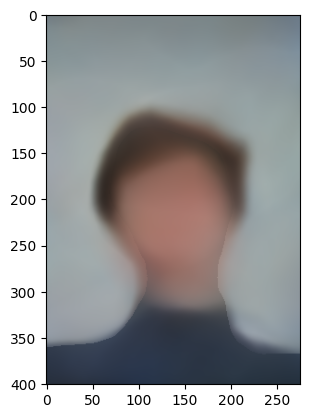

Loss: 0.003089052392169833


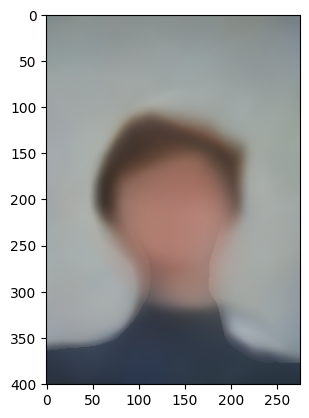

Loss: 0.021835550665855408


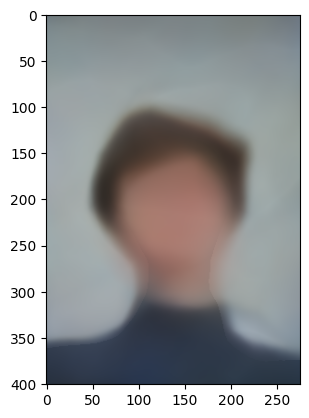

Loss: 0.027762774378061295


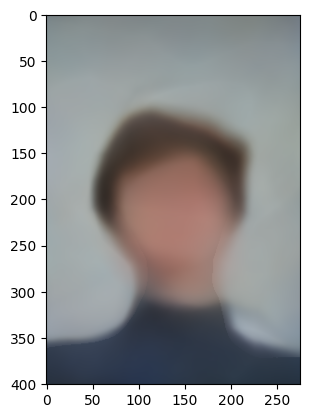

Loss: 0.027959568426012993


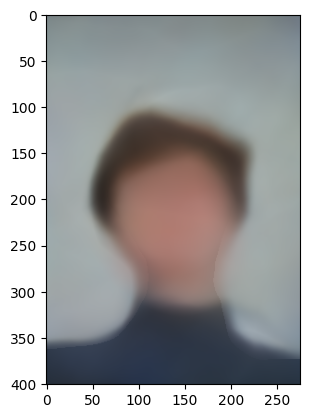

Loss: 0.026512645184993744


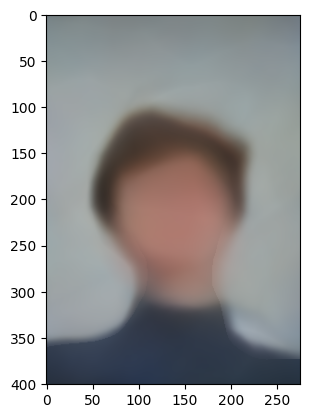

Loss: 0.011545456945896149


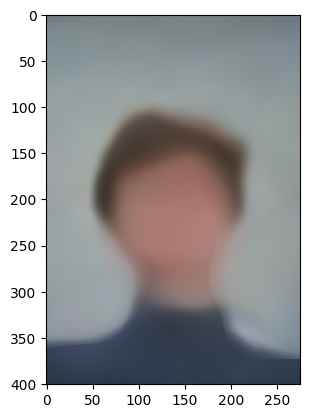

Loss: 0.017203230410814285


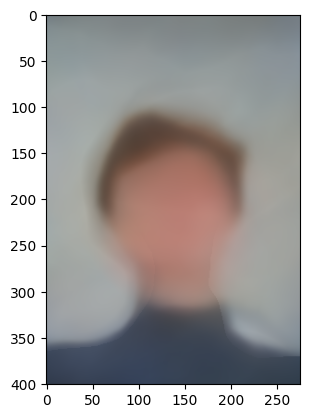

Loss: 0.03327383100986481


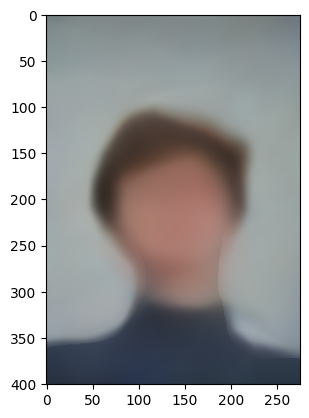

Loss: 0.03331359103322029


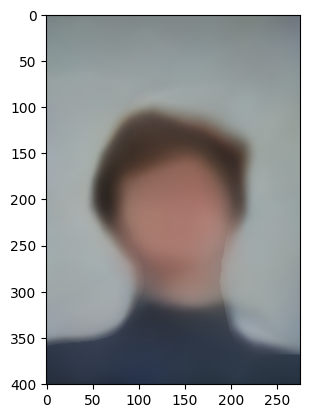

Loss: 0.011112506501376629


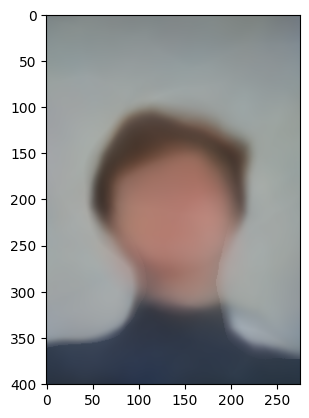

Loss: 0.025143278762698174


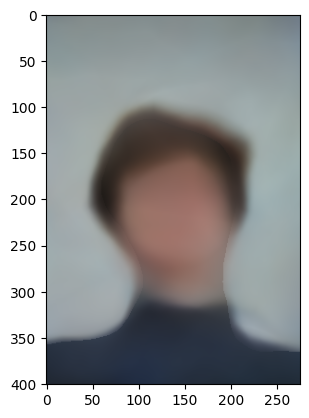

Loss: 0.002870904514566064


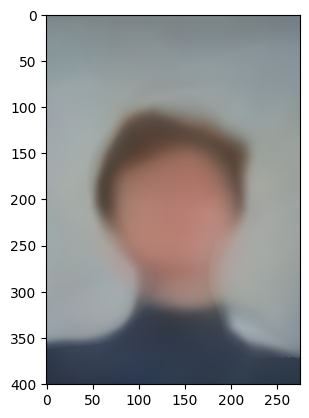

Loss: 0.007352954708039761


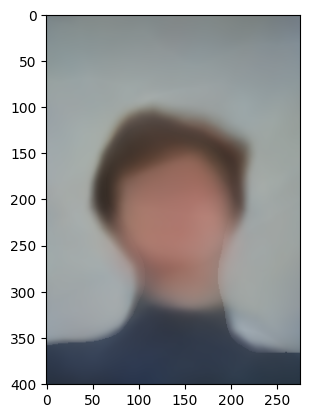

Loss: 0.02217583917081356


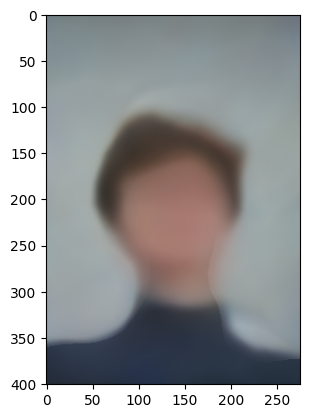

Loss: 0.022886857390403748


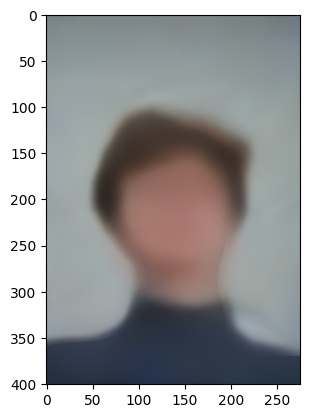

Loss: 0.0218458641320467


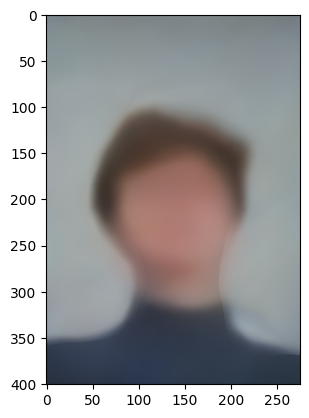

Loss: 0.04202680289745331


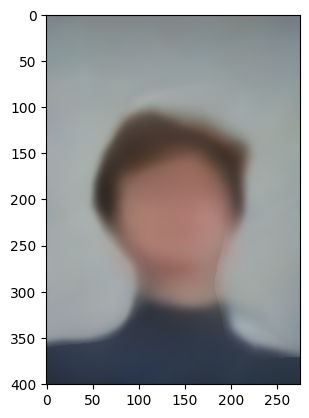

Loss: 0.029798556119203568


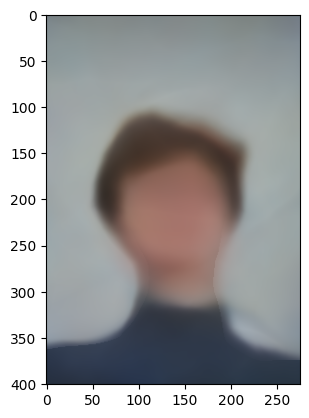

Loss: 0.03838236257433891


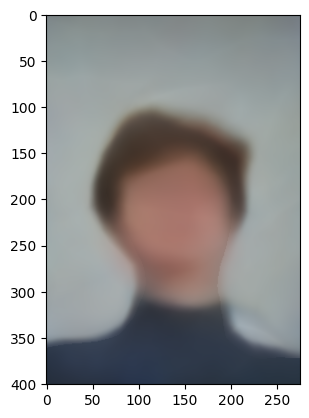

Loss: 0.03475315123796463


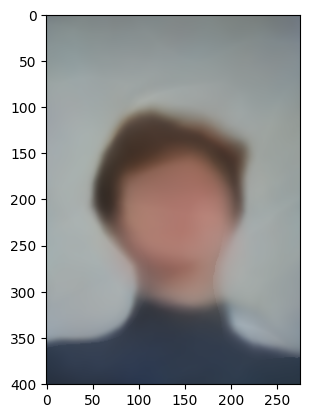

Loss: 0.028742719441652298


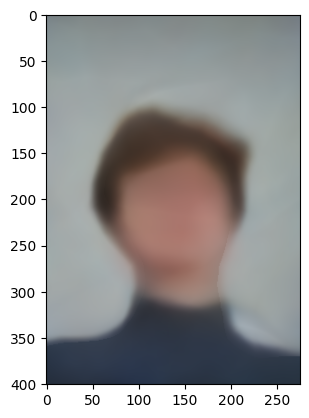

Loss: 0.01814701221883297


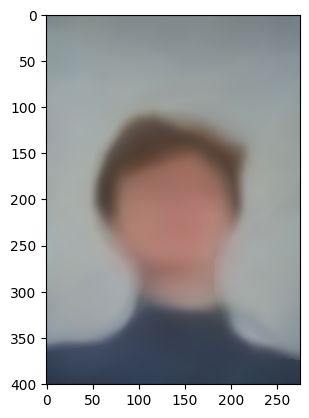

Loss: 0.025138143450021744


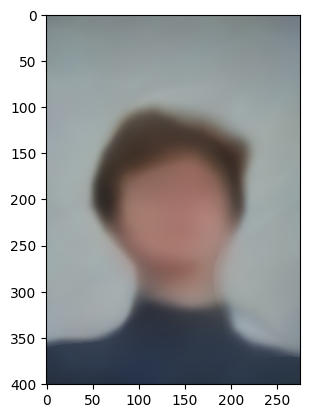

Loss: 0.024351483210921288


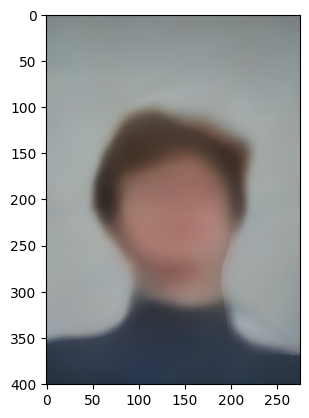

Loss: 0.0215388722717762


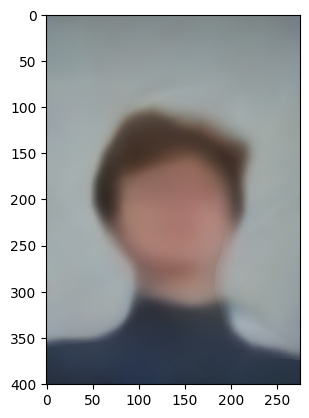

Loss: 0.028411678969860077


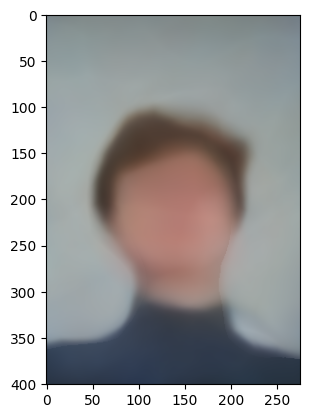

Loss: 0.0350058376789093


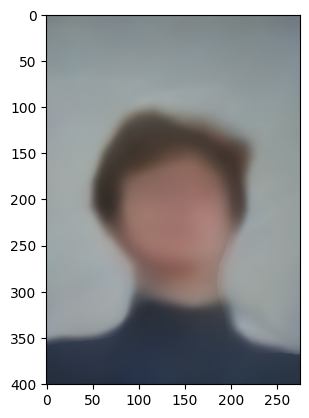

Loss: 0.037125278264284134


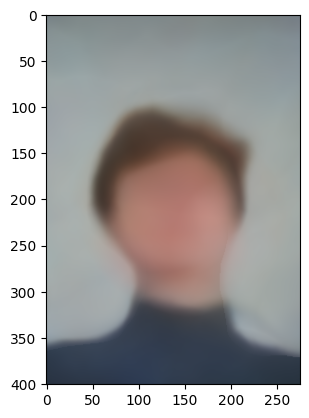

Loss: 0.02364160493016243


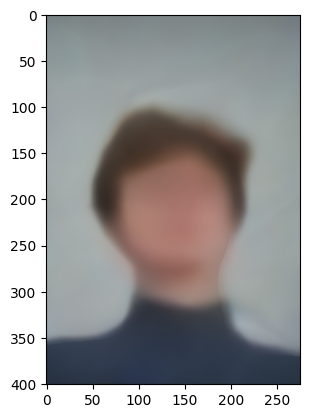

Loss: 0.017662115395069122


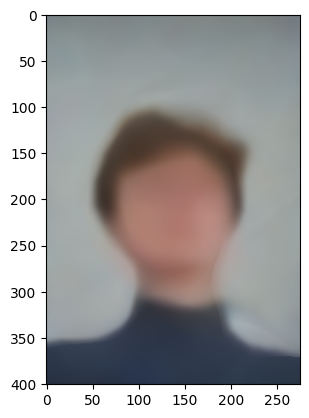

Loss: 0.02118023671209812


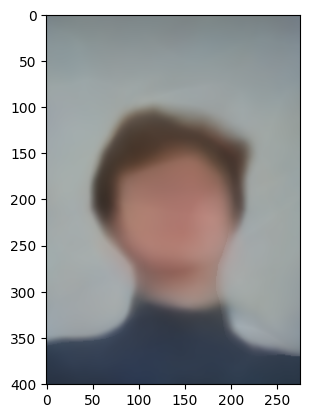

Loss: 0.02941017784178257


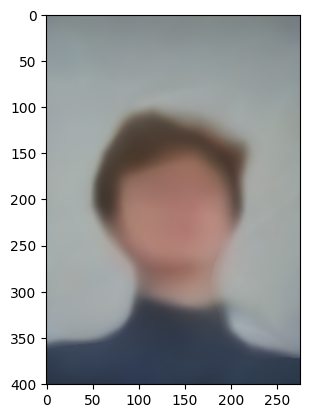

Loss: 0.03905630484223366


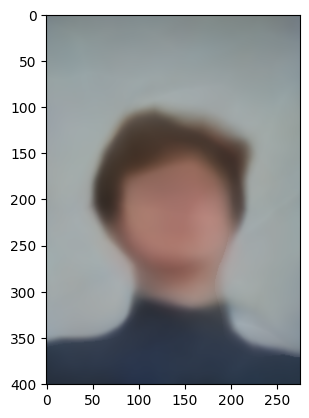

Loss: 0.02791251614689827


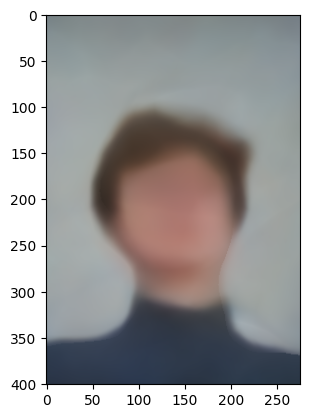

Loss: 0.01845686323940754


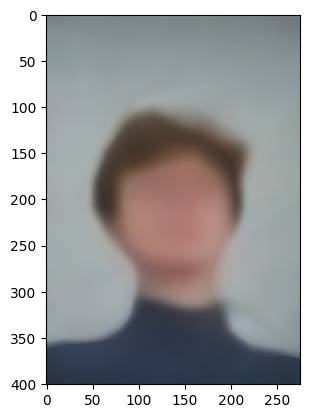

Loss: 0.010881643742322922


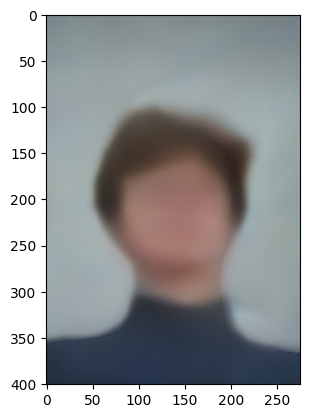

Loss: 0.0016797910211607814


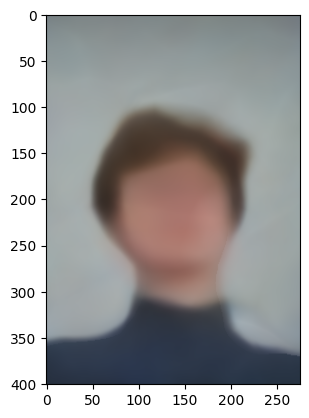

Loss: 0.028971202671527863


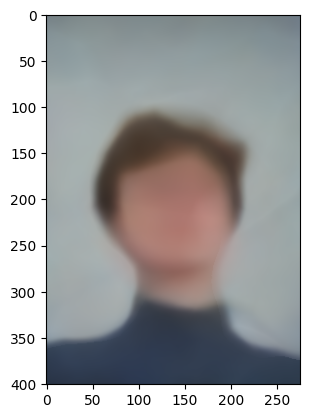

Loss: 0.0016950970748439431


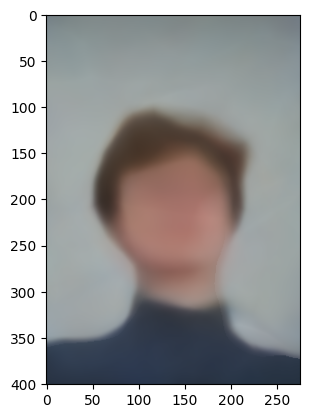

Loss: 0.021551575511693954


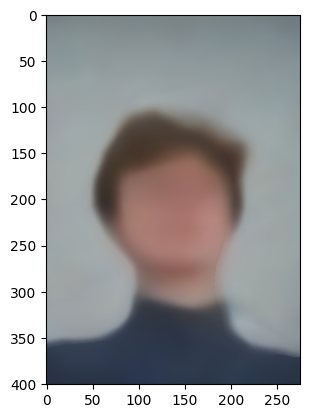

Loss: 0.011977522633969784


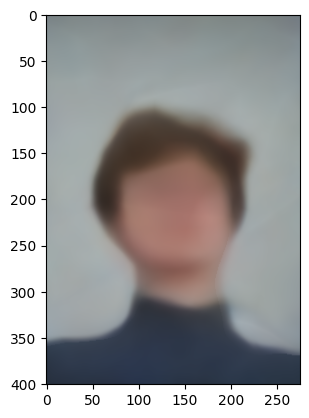

Loss: 0.03612583875656128


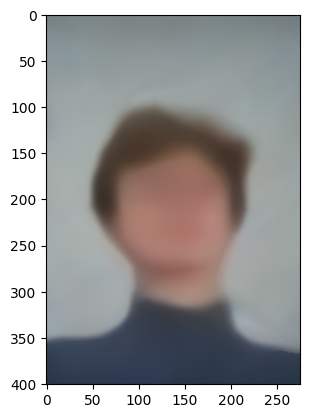

Loss: 0.02883368544280529


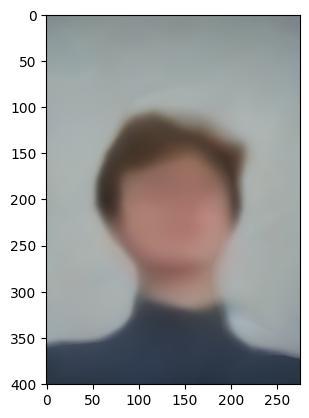

Loss: 0.022720303386449814


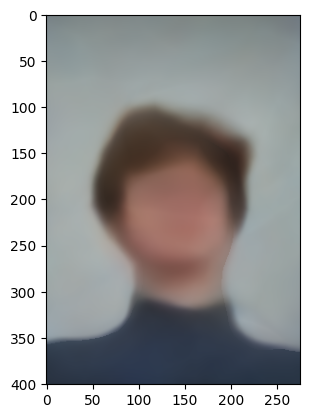

In [11]:
def encode_points(positions, num_encodings):
    '''
        Apply positional encoding to input points
    '''
    encoding = [positions]
    
    frequency_bands = 2.0 ** torch.linspace(
        0.0,
        num_encodings-1,
        num_encodings,
        dtype=positions.dtype,
        device=positions.device
        
    )
    
    for freq in frequency_bands:
        for func in [torch.sin, torch.cos]:
            encoding.append(func(positions * freq))

    return torch.cat(encoding, dim=-1)
            
def get_rays(height, width, f_x, f_y, cam2world):
    ii, jj = torch.meshgrid(
        torch.arange(width, dtype=cam2world.dtype, device=cam2world.device),
        torch.arange(height, dtype=cam2world.dtype, device=cam2world.device),
        indexing='xy'
    )
    
    # Multiplication with intrinsic camera matrix
    # OpenGL convention
    
    # width * 0.5 is essentially cx
    # height * 0.5 is essentially cy
    
    # y values (jj) top to bottom -> flip (-)
    # camera looks along negative z direction
    directions = torch.stack(
        [
            (ii - width * 0.5) / f_x,
            -(jj - height * 0.5) / f_y,
            -torch.ones_like(ii),
        ],
        dim=-1
    )
    
    ray_directions = torch.sum(
        directions[..., None, :] * cam2world[:3, :3], dim=-1
    )
    ray_origins = cam2world[:3, -1].expand(ray_directions.shape)
    
    return ray_origins, ray_directions


def compute_query_points(
    origins,
    directions,
    near,
    far,
    samples
):
    
    # Evenly distributed sample points between near
    # and far clipping plane
    depth_values = torch.linspace(near, far, samples).to(origins.device)
    
    query_points = (
        origins[..., None, :]
        + directions[..., None, :] * depth_values[..., :, None]
    ).to(origins.device)
    
    return query_points, depth_values

def cumprod_exclusive(tensor):
    dim = -1
    # Compute regular cumprod first (this is equivalent to `tf.math.cumprod(..., exclusive=False)`).
    cumprod = torch.cumprod(tensor, dim)
    # "Roll" the elements along dimension 'dim' by 1 element.
    cumprod = torch.roll(cumprod, 1, dim)
    # Replace the first element by "1" as this is what tf.cumprod(..., exclusive=True) does.
    cumprod[..., 0] = 1.0

    return cumprod


def render_volume_density(
    radiance_field, origins, depth_values
):
    sigma_a = torch.nn.functional.relu(radiance_field[..., 3])
    rgb = torch.sigmoid(radiance_field[..., :3])
    one_e_10 = torch.tensor([1e10], dtype=origins.dtype, device=origins.device)
    dists = torch.cat(
        (
            depth_values[..., 1:] - depth_values[..., :-1],
            one_e_10.expand(depth_values[..., :1].shape),
        ),
        dim=-1,
    )
    alpha = 1.0 - torch.exp(-sigma_a * dists)
    weights = alpha * cumprod_exclusive(1.0 - alpha + 1e-10)

    rgb_map = (weights[..., None] * rgb).sum(dim=-2)
    depth_map = (weights * depth_values).sum(dim=-1)
    acc_map = weights.sum(-1)

    return rgb_map, depth_map, acc_map
    


def iteration(height, width, f_x, f_y, cam2world, samples, bundle, model):
    '''
        Representing one iteration of the TinyNeRF model.
    '''
    
    # Near/far clipping values
    near = 2.0
    far = 6.0
    
    origins, directions = get_rays(height, width, f_x, f_y, cam2world)
    
    # At this point
    # query_points = (width,height,8,3)
    # contains 8 points (3 coordinates) for each ray
    query_points, depth_values = compute_query_points(
        origins, directions, near, far, samples
    )
    
    # Flattened query points
    # Points inside volumetric grid which depth
    # is needed
    f_query_points = query_points.reshape((-1,3))
    
    # Encode points
    encoded_points = encode_points(f_query_points, 6)
    
    # Total number of query points
    # E.g. Image: 100x100
    # 8 samples per ray
    # => 80000
    num_points = f_query_points.shape[0]
    
    # Divide query points into batches
    batches = [encoded_points[i : i + bundle] for i in range(0, num_points, bundle)]
    
    predicted = []
    #print(batches[0].shape)
    for batch in batches:
        predicted.append(model(batch))
        
    radiance_field_flattened = torch.cat(predicted, dim=0)

    # "Unflatten" to obtain the radiance field.
    unflattened_shape = list(query_points.shape[:-1]) + [4]
    radiance_field = torch.reshape(radiance_field_flattened, unflattened_shape)

    # Perform differentiable volume rendering to re-synthesize the RGB image.
    rgb_predicted, _, _ = render_volume_density(
        radiance_field, origins, depth_values
    )

    return rgb_predicted

def training():
    device = 'cuda'

    # global data
    # if not data:
    #    data = np.load('tiny_nerf_data.npz')
    
    # Extract data
    '''
    images = data['images']
    cam2world_matrices = data['poses']
    cam2world_matrices = torch.from_numpy(cam2world_matrices).to(device)
    focal_len = torch.from_numpy(data['focal']).to(device)
    
    height, width = images.shape[1:3]
    
    # Test image
    test_img = images[101]
    test_img = torch.from_numpy(test_img).to(device)
    test_pose = torch.from_numpy(data['poses'][101]).to(device)
    '''
    cam2world, intr, images = get_data('/mnt/hdd/models/head', '/mnt/hdd/data/mvs_images')
    images = np.stack(images, axis=0)
    cam2world = np.stack(cam2world, axis=0)

    height, width = images.shape[1:3]
    
    # Dont move images to CUDA device
    # images = torch.from_numpy(images).to(device)    
    
    # Test image
    test_img = images[12]
    test_img = torch.from_numpy(test_img).to(device)
    test_pose = torch.from_numpy(cam2world[12]).to(device)
    
    
    # Intrinsics
    # intr = (fx,fy,cx,cy) 
    f_x = torch.from_numpy(intr[0]).to(device)
    f_y = torch.from_numpy(intr[1]).to(device)
    
    
    # Hyperparameters
    ITERATIONS = 20000
    BUNDLE_SIZE = 1 << 14
    
    DISPLAY_ITER = 200
    
    # Samples per ray
    SAMPLES = 12
    
    LR = 4E-4
    
    # Model
    model = TinyNeRF()
    model.to(device)
    
    # Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    
    for i in range(ITERATIONS):
        # Train on random image
        target_img_idx = np.random.randint(images.shape[0])
        target_img = torch.from_numpy(images[target_img_idx]).to(device)
        cam2world_mat = torch.from_numpy(cam2world[target_img_idx]).to(device)
        
        rgb_predicted = iteration(
            height,
            width,
            
            
            f_x,
            f_y,
            
            cam2world_mat,
            SAMPLES,
            BUNDLE_SIZE,
            model
        )
        
        loss = torch.nn.functional.mse_loss(rgb_predicted, target_img)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if i % DISPLAY_ITER == 0:
            rgb_predicted = iteration(
                height,
                width,
                
                
                f_x,
                f_y,
                
                test_pose,
                SAMPLES,
                BUNDLE_SIZE,
                model
            )
            
            loss = torch.nn.functional.mse_loss(rgb_predicted, target_img)
            tqdm.write("Loss: " + str(loss.item()))
            plt.imshow(rgb_predicted.detach().cpu().numpy())
            plt.show()
            
        del target_img
    torch.save(model.state_dict(), 'tiny_nerf_model')
        
training()

In [8]:
n_model = TinyNeRF()
n_model.load_state_dict(torch.load('tiny_nerf_model'))
n_model.eval()

TinyNeRF(
  (layer_1): Linear(in_features=39, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=128, bias=True)
  (layer_4): Linear(in_features=128, out_features=4, bias=True)
)

In [ ]:
x = np.random.normal(0, 1, size=50)
y = 3 + 2.5 * x + np.random.normal(0, 1, size=50)

# Numpy meshgrid
w0, w1 = np.meshgrid(
    np.linspace(-5, 5, 50),
    np.linspace(-5, 5, 50),
    indexing='ij'
)

yhat = w0[:,None] + w1[:,None]*x
loss = np.square(y-yhat).mean(-1)

In [ ]:
x = torch.arange(2)
y = torch.arange(2)

xx, yy = torch.meshgrid(x,y, indexing='xy')
yy

In [ ]:
cam2world = data['poses'][0]

np.arange(10, dtype=cam2world.dtype)